<a href="https://colab.research.google.com/github/Edhotz/Modelo-de-Previs-o-de-Pre-os-de-Aluguel-em-Luanda/blob/main/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

Installing librarys



In [2]:
!pip install pandas


In [3]:
import pandas as pd

read_file = pd.read_csv('/content/housing_luanda.csv')

In [4]:
read_file.head()

,ID,Tipo,Quartos,Banheiros,Preço (USD),Área (m²),Localização,Ano de Construção
0,1,Apartamento,2,1,50000,80,Ingombota,2010
1,2,Casa,3,2,75000,120,Maianga,2005
2,3,Duplex,4,3,100000,150,Talatona,2015
3,4,Estúdio,1,1,35000,45,Samba,2000
4,5,Vila,5,4,150000,200,Miramar,2018


In [7]:
luanda_csv_file = pd.read_csv("/content/housing_luanda_atualizado.csv")

In [8]:
luanda_csv_file.head()

,ID,Tipo,Quartos,Banheiros,Preço (USD),Área (m²),Localização,Ano de Construção
0,1,Apartamento,2,2,70000,90,Ilha de Luanda,2012
1,2,Casa,3,3,120000,150,Benfica,2008
2,3,Duplex,4,3,150000,180,Talatona,2018
3,4,Estúdio,1,1,40000,50,Alvalade,2005
4,5,Vila,5,4,200000,250,Miramar,2020


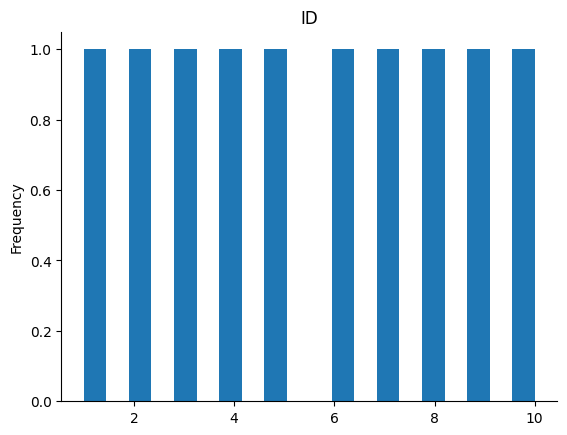

In [10]:
# @title ID

from matplotlib import pyplot as plt
luanda_csv_file['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

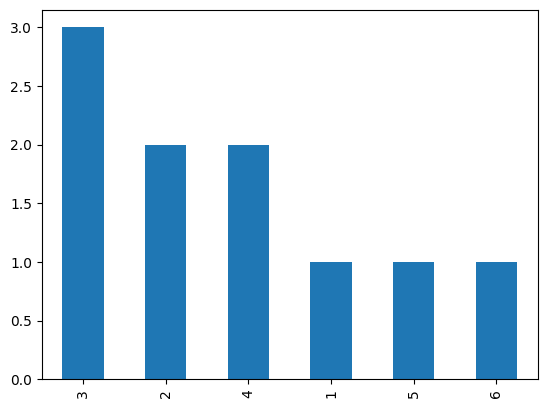

In [11]:
# prompt: Usando o DataFrame luanda_csv_file:

# Create a scatter plot of price vs area
chart = alt.Chart(luanda_csv_file).mark_point().encode(
    x='Pre\u00e7o (USD)',
    y='\u00c1rea (m\u00b2)'
)
chart


In [12]:
# prompt: Usando o DataFrame luanda_csv_file: Search the best location to buy houses

# Find the average price for each location
average_prices = luanda_csv_file.groupby('Localiza\u00e7\u00e3o')['Pre\u00e7o (USD)'].mean()

# Find the location with the lowest average price
best_location = average_prices.sort_values().index[0]

print(f"The best location to buy a house is {best_location}.")


The best location to buy a house is Alvalade.


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Carregar os dados
df = pd.read_csv('/content/housing_luanda_atualizado.csv')  # Atualize com o caminho correto do arquivo

# Codificando a variável 'Localização' com OneHotEncoder
encoder = OneHotEncoder(sparse=False)
localizacao_encoded = encoder.fit_transform(df[['Localização']])

# Criando um DataFrame a partir das localizações codificadas
localizacao_encoded_df = pd.DataFrame(localizacao_encoded, columns=encoder.get_feature_names_out(['Localização']))

# Concatenando os novos dados codificados com os dados originais, excluindo a coluna 'Localização' original
df_encoded = pd.concat([df.drop(['ID', 'Tipo', 'Localização', 'Preço (USD)'], axis=1), localizacao_encoded_df], axis=1)

# Variável dependente
y = df['Preço (USD)']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Predições e avaliação do modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Analisando os coeficientes das variáveis, incluindo as localizações, para identificar quais oferecem melhor valor
coeficientes = pd.DataFrame(model.coef_, df_encoded.columns, columns=['Coeficiente']).sort_values(by='Coeficiente')

print(f"RMSE: {rmse}")
print("Coeficientes do modelo:")
print(coeficientes)


RMSE: 11424.928348692267
Coeficientes do modelo:
                             Coeficiente
Quartos                    -2.643824e+04
Localização_Samba          -2.153983e+04
Banheiros                  -1.430132e+04
Localização_Ilha de Luanda -1.306412e+04
Localização_Miramar        -1.204186e+04
Localização_Alvalade       -1.193926e+04
Localização_Ingombota      -3.877564e+03
Localização_Talatona       -2.932008e+03
Localização_Viana           0.000000e+00
Localização_Benfica         3.637979e-12
Área (m²)                   1.354188e+03
Ano de Construção           2.528129e+03
Localização_Kilamba         2.437678e+04
Localização_Maianga         4.101786e+04


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
